In [1]:
#import geopandas
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os, os.path
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from ipynb.fs.full.interp_data import interpolate_scenario_data

- assumed 40 years life time (Tong 2019)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
C1_c = "#649B1C"
C2_c = "#00B593"
C3_c = "#4E84D4"

In [4]:
crosswalk = pd.read_excel("../../data/MESSAGE/mapping_file_R10edit.xlsx",sheet_name="main")
AR6_list = crosswalk["AR6_R10"].unique()
crosswalk.head()

,Countries,R10,AR6_R10,GEM_Name,ISO
0,Algeria,Africa (R10),R10AFRICA,Algeria,DZA
1,Angola,Africa (R10),R10AFRICA,Angola,AGO
2,Benin,Africa (R10),R10AFRICA,NaN,BEN
3,Botswana,Africa (R10),R10AFRICA,NaN,BWA
4,Burkina Faso,Africa (R10),R10AFRICA,NaN,BFA


In [5]:
# load data
ar6_world = pd.read_csv("../../data/AR6_data/1668008174375-AR6_Scenarios_Database_R10_regions_v1.1.csv/AR6_Scenarios_Database_R10_regions_v1.1.csv")
ar6_scen = pd.read_excel("../../data/AR6_data/AR6_Scenarios_Database_World_v1.1/AR6_Scenarios_Database_metadata_indicators_v1.1.xlsx",sheet_name = "meta_Ch3vetted_withclimate")

In [6]:
ar6_scen_123 = ar6_scen[ar6_scen["Category"].isin(["C1","C2","C3"])]

In [7]:
ar6_world_gas = ar6_world.query("Variable=='Capacity|Electricity|Gas|w/o CCS'")
ar6_world_gas = interpolate_scenario_data(ar6_world_gas)
ar6_world_gas = pd.merge(ar6_world_gas,ar6_scen_123[["Model","Scenario","Category"]],
                                  left_on=["Model","Scenario"],right_on=["Model","Scenario"])
ar6_world_gas_melt = pd.melt(ar6_world_gas,id_vars=["Model","Scenario","Category","Region"],value_vars=ar6_world_gas.columns[5:-1],var_name="Year",value_name="CumGas_GW").dropna()
ar6_world_gas_melt["Year"] = ar6_world_gas_melt["Year"].astype(int)
ar6_world_gas_melt = ar6_world_gas_melt.sort_values("Category")
ar6_world_gas_melt = ar6_world_gas_melt[ar6_world_gas_melt["Year"]>=2020]
ar6_world_gas_melt

,Model,Scenario,Category,Region,Year,CumGas_GW
218646,REMIND-MAgPIE 2.1-4.2,CEMICS_SSP2-1p5C-fullCDR,C1,R10NORTH_AM,2049,2.481480
61329,REMIND-MAgPIE 1.7-3.0,PEP_1p5C_red_eff,C1,R10AFRICA,2024,30.233160
61330,REMIND-MAgPIE 1.7-3.0,PEP_1p5C_red_eff,C1,R10CHINA+,2024,367.323220
61331,REMIND-MAgPIE 1.7-3.0,PEP_1p5C_red_eff,C1,R10EUROPE,2024,251.029940
61332,REMIND-MAgPIE 1.7-3.0,PEP_1p5C_red_eff,C1,R10INDIA+,2024,34.321920
...,...,...,...,...,...,...
171119,REMIND 2.1,TechCost-SSP2-B1100-ccsH,C3,R10REST_ASIA,2034,290.225260
171120,REMIND 2.1,TechCost-SSP2-B1100-ccsH,C3,R10ROWO,2034,10.379100
171121,REMIND 2.1,TechCost-SSP2-B1100-coalH,C3,R10AFRICA,2034,79.259360
171107,REMIND 2.1,TechCost-SSP2-B1100-bioH,C3,R10REF_ECON,2034,160.169180


In [8]:
ar6_world_gas_melt.set_index("Model").to_csv("AR6_Gas_GW_R10_capacity.csv")

### gas fleet data

In [110]:
hist_gas = pd.read_csv("../../data/global_GEM/gas_plant_annual_summary.csv")
hist_gas_sum = pd.merge(hist_gas,crosswalk[["GEM_Name","AR6_R10"]],left_on="Country",right_on="GEM_Name")
hist_gas_sum = hist_gas_sum.groupby(["Year","AR6_R10"]).sum()[["Capacity elec. (MW)"]]
hist_gas_sum["GW"] = hist_gas_sum["Capacity elec. (MW)"]/1000
hist_gas_sum = hist_gas_sum[["GW"]]
hist_gas_sum["Type"] = "Historical"
hist_gas_sum

GW        Type
Year AR6_R10                            
1924 R10EUROPE         0.050  Historical
1925 R10EUROPE         0.050  Historical
     R10REF_ECON       0.080  Historical
1926 R10EUROPE         0.050  Historical
     R10REF_ECON       0.080  Historical
...                      ...         ...
2023 R10MIDDLE_EAST  281.996  Historical
     R10NORTH_AM     567.794  Historical
     R10PAC_OECD     101.921  Historical
     R10REF_ECON     157.885  Historical
     R10REST_ASIA    165.453  Historical

[719 rows x 2 columns]

In [54]:
aged_gas = pd.read_csv("../../data/global_GEM/gas_plant_geriatric.csv")
aged_gas_sum = pd.merge(aged_gas,crosswalk[["GEM_Name","AR6_R10"]],left_on="Country",right_on="GEM_Name")
aged_gas_sum = aged_gas_sum.groupby(["Year","AR6_R10"]).sum()[["GW"]]
aged_gas_sum

GW
Year AR6_R10               
2023 R10AFRICA        2.833
     R10EUROPE       13.686
     R10INDIA+        0.674
     R10LATIN_AM     11.162
     R10MIDDLE_EAST  19.404
     R10NORTH_AM     81.166
     R10PAC_OECD     11.891
     R10REF_ECON     68.975
     R10REST_ASIA     1.478

In [127]:
for current_type in ["low","mid","high"]:
    com_gas = pd.read_csv("../../data/global_GEM/gas_plant_current_committed_"+current_type+".csv")
    com_gas_sum = pd.merge(com_gas,crosswalk[["GEM_Name","AR6_R10"]],left_on="Country",right_on="GEM_Name")
    com_gas_sum = com_gas_sum.groupby(["Year","AR6_R10"]).sum()[["GW"]]
    com_gas_sum = pd.concat([com_gas_sum,hist_gas_sum.loc[[2023],:][["GW"]]-aged_gas_sum])
    com_gas_sum["Type"] = "Current_"+current_type
    if current_type =="low":
        sum_com_gas_all = com_gas_sum
    else:
        sum_com_gas_all = pd.concat([sum_com_gas_all,com_gas_sum])
sum_com_gas_all

GW          Type
Year AR6_R10                              
2024 R10AFRICA        96.915   Current_low
     R10CHINA+       121.225   Current_low
     R10EUROPE       199.587   Current_low
     R10INDIA+        46.770   Current_low
     R10LATIN_AM      99.147   Current_low
...                      ...           ...
2023 R10MIDDLE_EAST  262.592  Current_high
     R10NORTH_AM     486.628  Current_high
     R10PAC_OECD      90.030  Current_high
     R10REF_ECON      88.910  Current_high
     R10REST_ASIA    163.975  Current_high

[1530 rows x 2 columns]

In [140]:
for const_type in ["low","mid","high"]:
    gas_const = pd.read_csv("../../data/global_GEM/gas_plant_construction_"+const_type+".csv")
    com_gas = pd.read_csv("../../data/global_GEM/gas_plant_current_committed_"+const_type+".csv")
    sum_com_const = pd.concat([gas_const,com_gas])
    sum_com_const = pd.merge(sum_com_const,crosswalk[["AR6_R10","ISO","GEM_Name"]],left_on="Country",right_on="GEM_Name")
    sum_com_const = sum_com_const.groupby(["Year","AR6_R10"]).sum()[["GW"]]
    sum_com_const["Type"] = "Construction_"+const_type
    if const_type =="low":
        sum_com_const_all = pd.concat([sum_com_const,hist_gas_sum.loc[[2023],:]])
    else:
        sum_com_const_all = pd.concat([sum_com_const_all,sum_com_const])
sum_com_const_all

GW               Type
Year AR6_R10                                    
2024 R10AFRICA       106.8510   Construction_low
     R10CHINA+       153.5750   Construction_low
     R10EUROPE       210.4080   Construction_low
     R10INDIA+        50.5890   Construction_low
     R10LATIN_AM     106.9500   Construction_low
...                       ...                ...
2076 R10MIDDLE_EAST   15.4429  Construction_high
     R10NORTH_AM       0.1610  Construction_high
     R10PAC_OECD       0.0000  Construction_high
     R10REF_ECON       0.0000  Construction_high
     R10REST_ASIA      1.0500  Construction_high

[1540 rows x 2 columns]

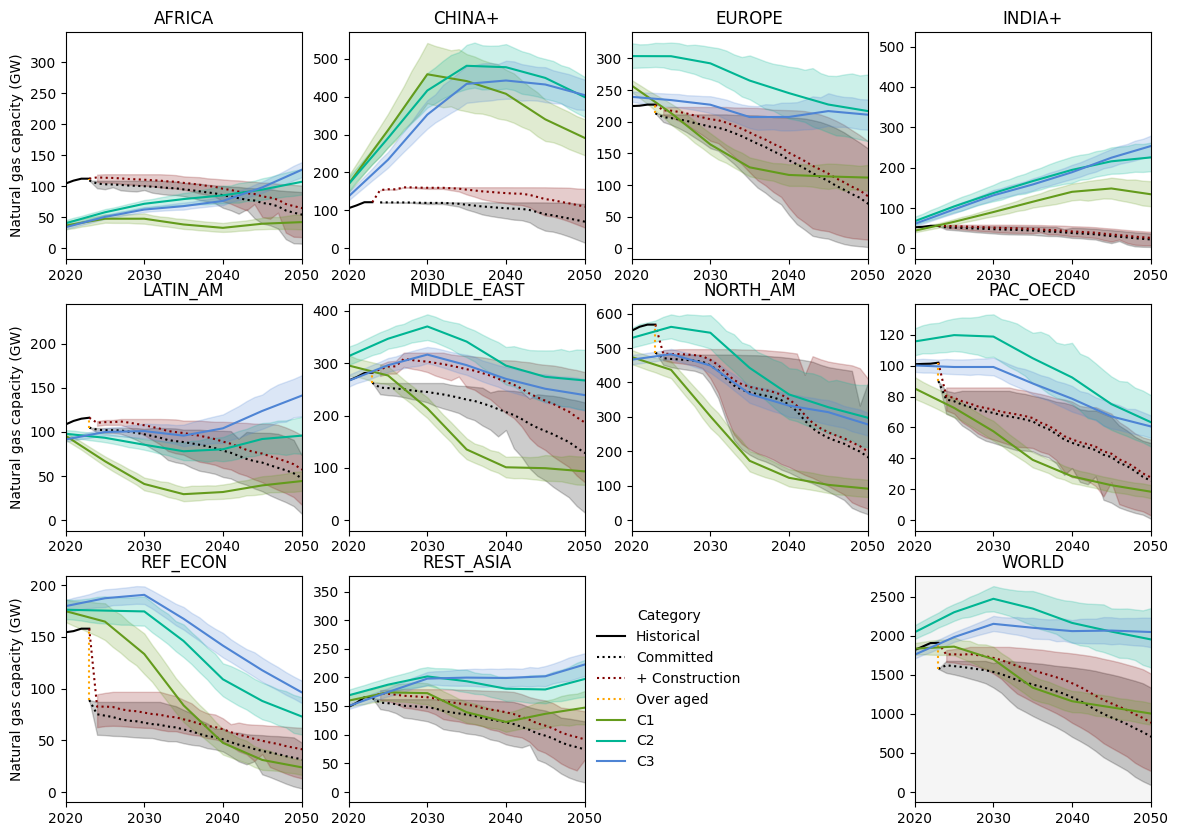

In [142]:
fig, axes = plt.subplots(3,4,figsize=(14,10))
row_list = [0,0,0,0,1,1,1,1,2,2,2]
col_list = [0,1,2,3,0,1,2,3,0,1,3]
plot_type = "2050" # "hist" "2050"
hist_gas_sum_p = hist_gas_sum.reset_index()
sum_com_gas_all_p = sum_com_gas_all.reset_index()
sum_com_const_all_p = sum_com_const_all.reset_index()

for n_r10 in np.arange(len(AR6_list)+1):
    this_ax = axes[row_list[n_r10],col_list[n_r10]]
    
    if n_r10<10: # separate R10 regions
        r10 = AR6_list[n_r10]
        ar6_world_gas_r = ar6_world_gas_melt[ar6_world_gas_melt["Region"]==r10]
        historical_gas = hist_gas_sum_p[hist_gas_sum_p["AR6_R10"]==r10]
        committed_gas = sum_com_gas_all_p[sum_com_gas_all_p["AR6_R10"]==r10]
        construction_gas = sum_com_const_all_p[sum_com_const_all_p["AR6_R10"]==r10]
    else: # summarize data in the wolrd
        r10 = "R10WORLD"
        ar6_world_gas_r = ar6_world_gas_melt.groupby(["Year","Model","Scenario","Category"]).sum()[["CumGas_GW"]]
        ar6_world_gas_r = ar6_world_gas_r.sort_values("Category")
        historical_gas = hist_gas_sum_p.groupby("Year").sum()[["GW"]]
        committed_gas = sum_com_gas_all_p.groupby(["Year","Type"]).sum()[["GW"]]
        construction_gas = sum_com_const_all_p.groupby(["Year","Type"]).sum()[["GW"]]

    sns.lineplot(x='Year', y='GW', data=historical_gas,ax=this_ax,color="black",label="Historical")
    sns.lineplot(x='Year', y='GW', data=committed_gas,ax=this_ax,color="black",label="Committed",linestyle=":")
    sns.lineplot(x='Year', y='GW', data=construction_gas,ax=this_ax,color="maroon",label="+ Construction",linestyle=":")
    this_ax.vlines(x = 2023, ymin = committed_gas.query("Year==2023")["GW"].mean(),
                   ymax = historical_gas.query("Year==2023")["GW"], color="orange",linestyle=":",label="Over aged")
    sns.lineplot(x='Year', y='CumGas_GW', hue='Category', data=ar6_world_gas_r,palette=[C1_c,C2_c,C3_c],ax=this_ax)
    
    this_ax.set_xlabel(None)
    this_ax.set_title(r10[3:])
    if n_r10 == 9:
        this_ax.legend(title = 'Category', loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
    else:
        this_ax.get_legend().remove()
        
    if n_r10 == 0 or n_r10 == 4 or n_r10 == 8:
        this_ax.set_ylabel("Natural gas capacity (GW)")
    else:
        this_ax.set_ylabel(None)
    
    if n_r10 == 10:
        this_ax.set_facecolor('whitesmoke')
        
    if plot_type == "hist":
        this_ax.set_xlim([1930,2100])
    elif plot_type == "2050":
        this_ax.set_xlim([2020,2050])
    
fig.delaxes(axes[2,2])
fig.savefig("committed_gas_"+plot_type+"_R10.png",dpi=600, bbox_inches='tight')